## Exploring the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TSLA.csv') #Reading the supplied data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
findf = df.drop(['Date','Adj Close'],axis = 1) #Dropping the unrequired columns

In [5]:
findf.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
findf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Close   2416 non-null   float64
 4   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.5 KB


## Checking for discerete values

In [7]:
attributes = ['Close','High','Low','Open','Volume']
findf[attributes].value_counts()

Close       High        Low         Open        Volume  
15.800000   16.629999   14.980000   16.400000   6921700     1
246.649994  254.729996  245.460007  250.460007  3703200     1
246.869995  250.070007  245.320007  247.000000  3725200     1
246.949997  254.960007  246.100006  252.520004  4834200     1
246.990005  252.119995  243.639999  249.119995  13475300    1
                                                           ..
141.600006  141.699997  134.210007  137.000000  9061500     1
142.000000  143.910004  140.970001  141.630005  7108100     1
142.149994  145.729996  141.100006  144.750000  9254500     1
142.190002  145.869995  139.860001  140.050003  10748200    1
780.000000  786.140015  673.520020  673.690002  47065000    1
Name: count, Length: 2416, dtype: int64

## Finding Correlations

In [8]:
corr_matrix = findf.corr()
corr_matrix['Close'].sort_values(ascending = False)

Close     1.000000
High      0.999640
Low       0.999447
Open      0.998886
Volume    0.505169
Name: Close, dtype: float64

array([[<Axes: xlabel='Close', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='Volume', ylabel='Close'>],
       [<Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Close', ylabel='Volume'>,
        <Axes: xlab

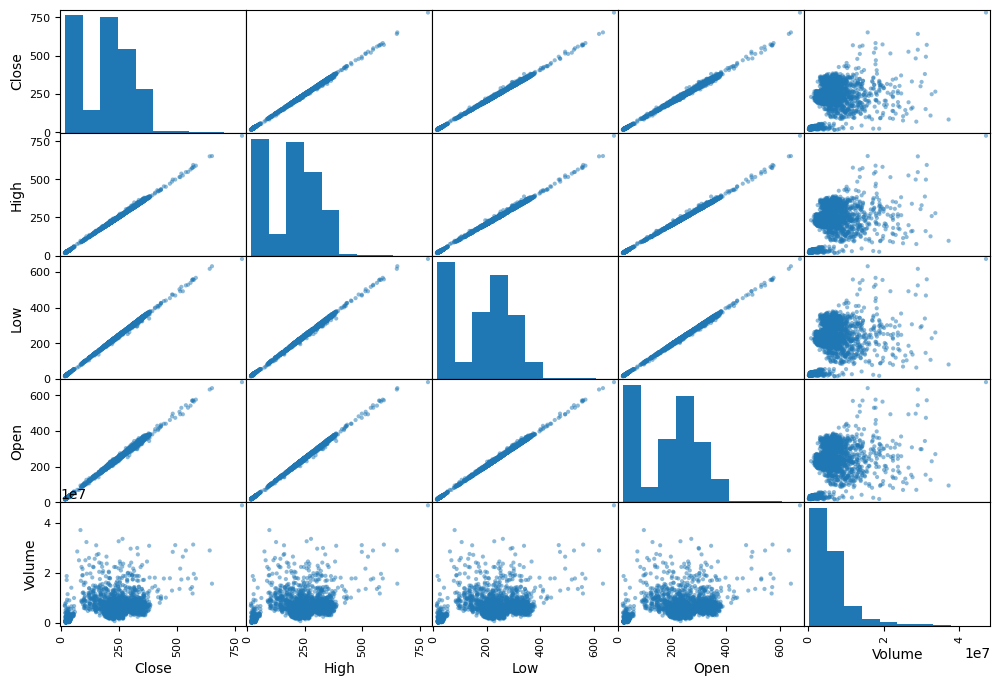

In [9]:
pd.plotting.scatter_matrix(findf[attributes],figsize = (12,8))

## Checking for Null Values

In [10]:
findf.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Splitting features and models

In [11]:
import numpy as np
x = np.array(findf.drop("Close",axis = 1))
y = np.array(findf["Close"].copy())

## Train-test splitting

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Choosing the model

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

## Testing the model and evaluating its performance

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = model.predict(x_test)

In [16]:
mse = mean_squared_error(y_pred, y_test)

In [17]:
rmse = np.sqrt(mse)

In [18]:
rmse

2.09270994034476

In [19]:
model.score(x_test,y_test)

0.9997117604197432

## Saving the model using joblib

In [20]:
from joblib import dump
dump(model, 'Tesla.joblib')

['Tesla.joblib']

LINEAR REGRESSION

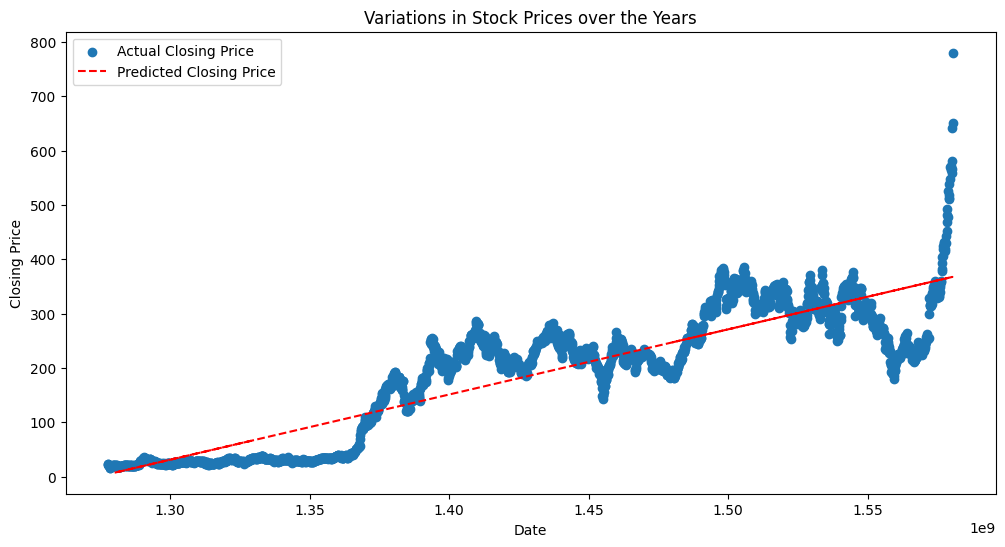

Prediction Time: 0.0 seconds
Training Time: 0.0 seconds
Mean Squared Error (MSE): 3012.23
R-squared (Accuracy): 0.80


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())  # Convert datetime to Unix timestamp

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model and measure training time
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Actual Closing Price')
plt.plot(X_test, y_pred, label='Predicted Closing Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Print prediction time, training time, and accuracy
print("Prediction Time:", prediction_time, "seconds")
print("Training Time:", training_time, "seconds")

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (Accuracy)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")



DEISION TREE CLASSIFICATION

Accuracy: 0.7086776859504132
Training Time: 0.033365488052368164 seconds
Prediction Time: 0.0 seconds


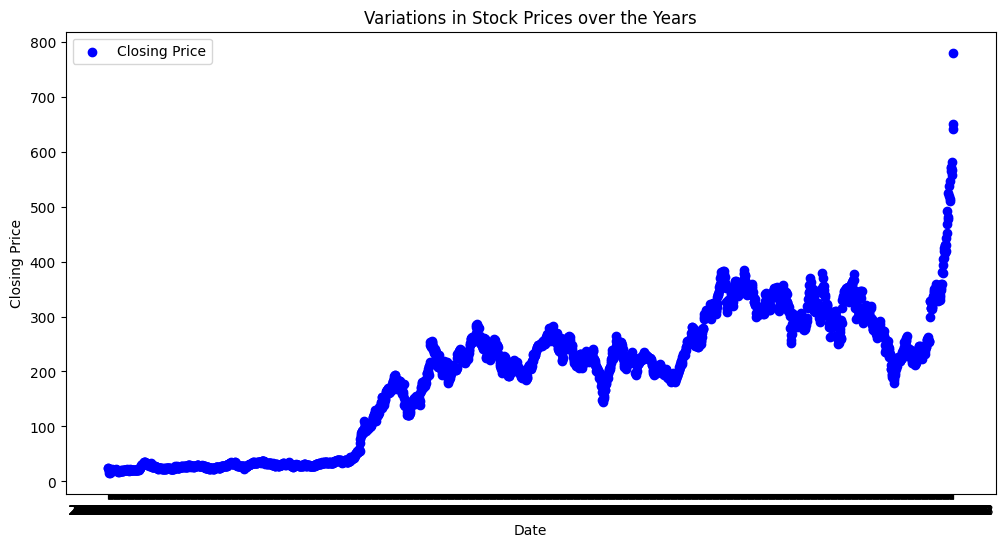

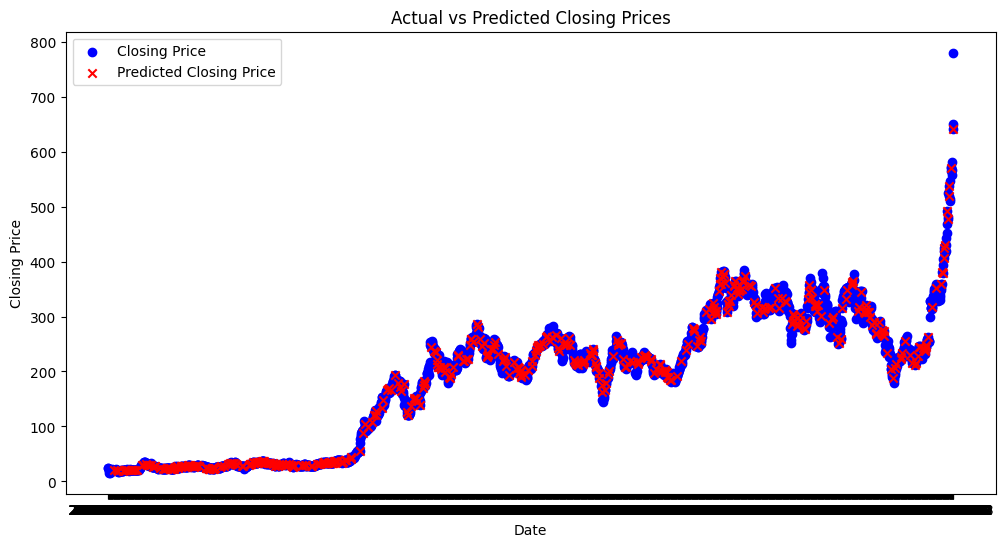

Mean Squared Error (MSE): 0.29
R-squared (Accuracy): -0.17


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Create a new column indicating whether the closing price increased (1) or decreased (0) compared to the previous day
data['Target'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Drop the first row since it doesn't have a previous day's closing price
data = data.dropna()

# Define features (independent variables) and target (dependent variable)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using OHLCV data as features
y = data['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier and measure training time
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Predict on the testing set
y_pred = model.predict(X_test)

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')

# Plot the predicted closing prices on the testing set
plt.scatter(X_test.index, X_test['Close'], label='Predicted Closing Price', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (Accuracy)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")




POLYNOMIAL REGRESSION

c:\Users\amanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


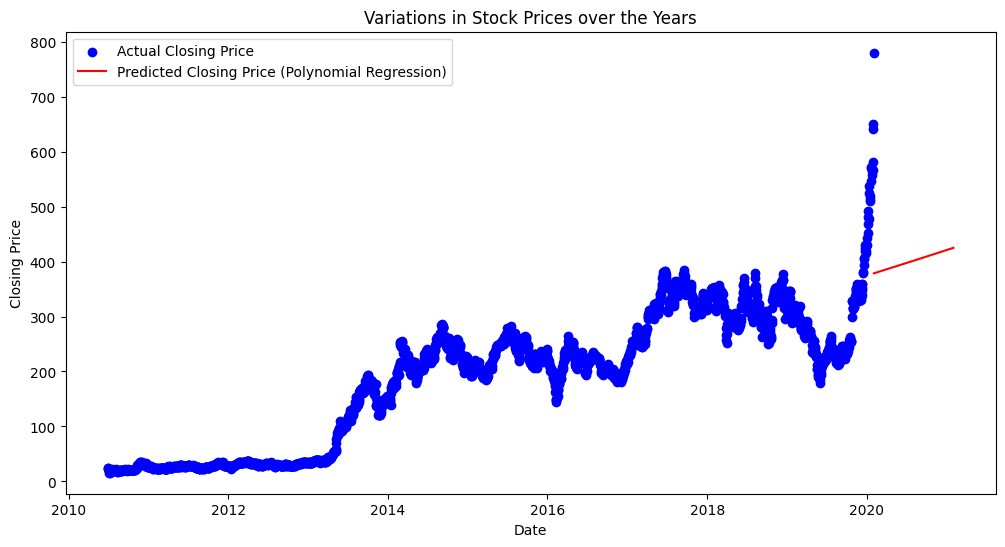

Mean Squared Error (MSE): 49850.56
R-squared (Accuracy): -2.28


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Generate a sequence of dates for prediction
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=365)

# Convert future dates to polynomial features
future_dates_poly = poly_features.transform(np.array(future_dates).reshape(-1, 1))

# Predict closing prices for future dates
future_prices = model.predict(future_dates_poly)

# Predict closing prices for future dates
future_prices = model.predict(future_dates_poly)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Closing Price')
plt.plot(future_dates, future_prices, color='red', label='Predicted Closing Price (Polynomial Regression)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (Accuracy)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")


DESCISSION TREE CLASSIFIER

Accuracy: 0.7169421487603306
Training Time: 0.026711702346801758 seconds
Prediction Time: 0.0011487007141113281 seconds
Mean Absolute Error (MAE): 0.2830578512396694
Mean Squared Error (MSE): 0.2830578512396694


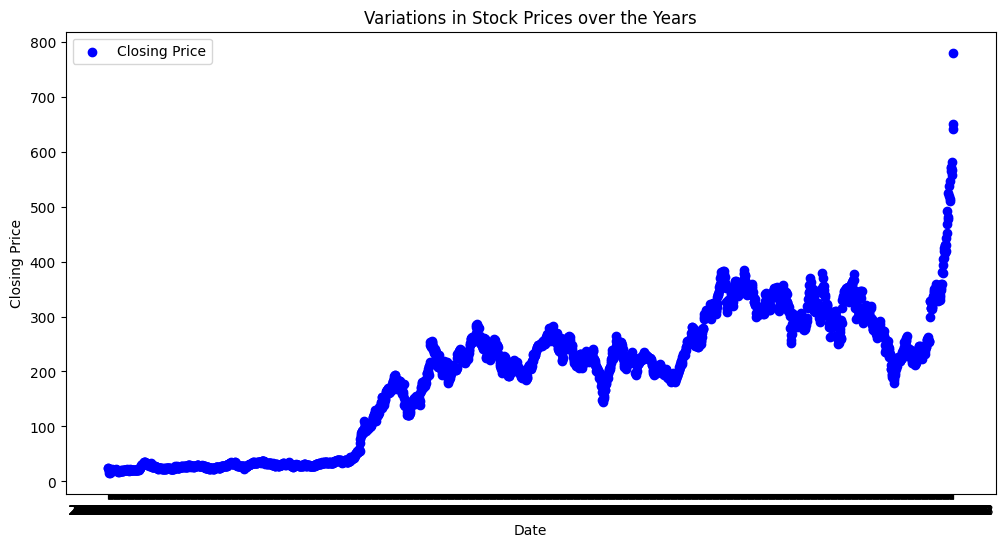

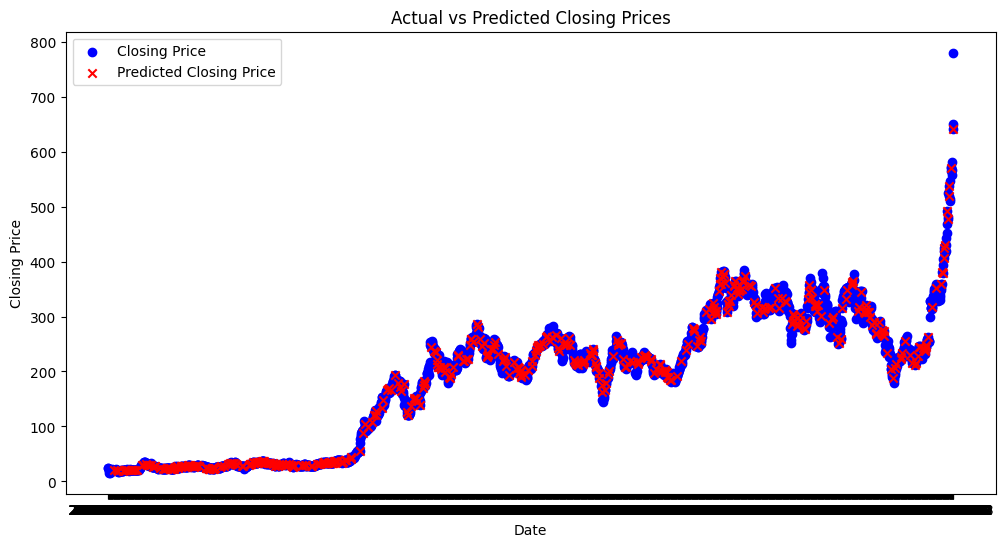

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Create a new column indicating whether the closing price increased (1) or decreased (0) compared to the previous day
data['Target'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Drop the first row since it doesn't have a previous day's closing price
data = data.dropna()

# Define features (independent variables) and target (dependent variable)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using OHLCV data as features
y = data['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier and measure training time
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Plot the graph showing actual vs predicted closing prices
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.scatter(X_test.index, X_test['Close'], label='Predicted Closing Price', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


KNN CLASSIFIER

Training Time:  0.0037178993225097656
Prediction Time:  0.0034155845642089844
Mean Squared Error:  205.84209022119953


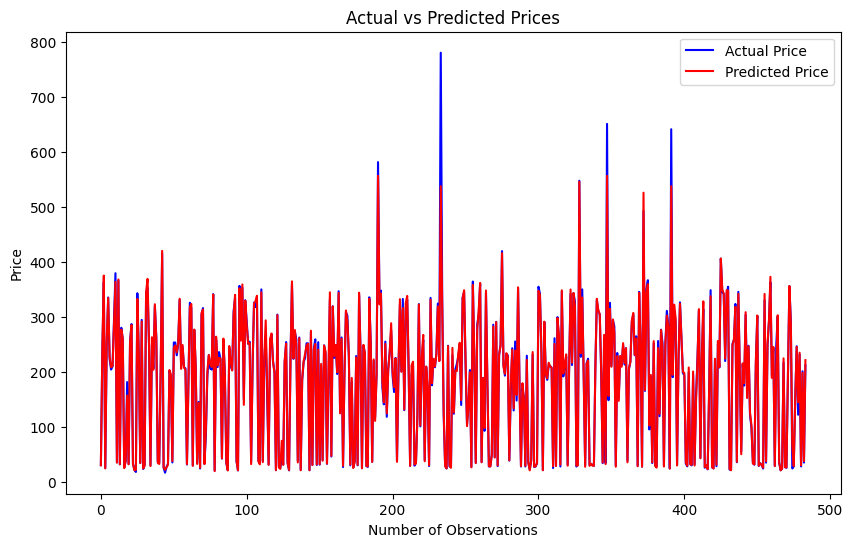

R-squared (Accuracy): 0.99


In [25]:
# Import necessary libraries
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('TSLA.csv')

# Convert the date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Create new columns for year, month, and day
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

# Now you can drop the original 'Date' column
dataset = dataset.drop(columns=['Date'])


# Assume 'Close' is the column for closing prices
X = dataset.iloc[:, :-1].values
y = dataset['Close'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the KNN model on the training data
knn = KNeighborsRegressor(n_neighbors=5)

# Calculate training time
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time: ", training_time)

# Calculate prediction time
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time: ", prediction_time)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Number of Observations')
plt.ylabel('Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (Accuracy)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Accuracy): {r2:.2f}")



LSTM

Epoch 1/50


c:\Users\amanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0299
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7084e-04
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8336e-04
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3730e-04
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4169e-04
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4665e-04
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5470e-04
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3368e-04
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5053e-04
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2578e-04
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4953e-04
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9573e-04
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6193e-04
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1969e-04
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

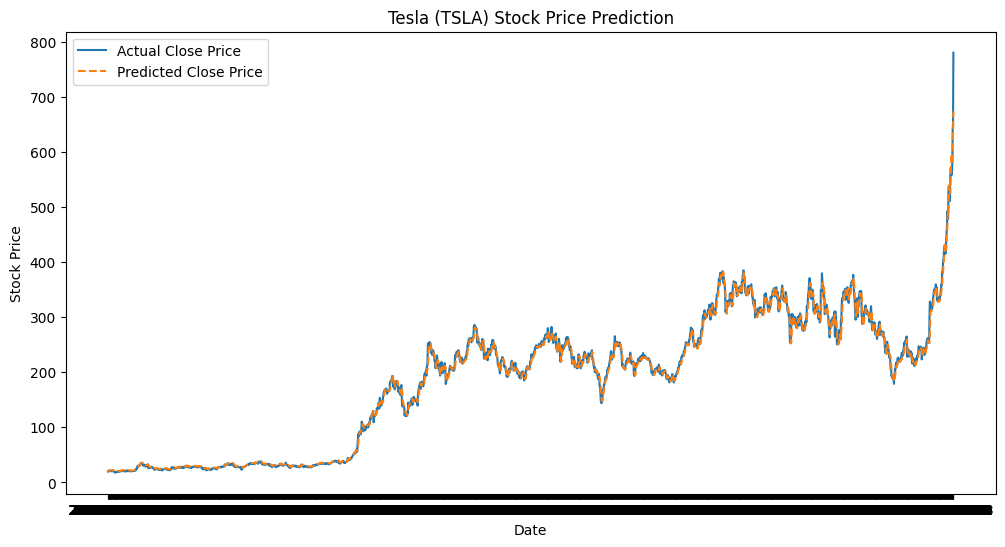

R-squared (Accuracy) on training data: 1.00


In [26]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import time

# # Load the TSLA.csv file
# data = pd.read_csv('TSLA.csv')
# close_prices = data['Close'].values.reshape(-1, 1)

# # Normalize the data using Min-Max scaling
# scaler = MinMaxScaler()
# scaled_prices = scaler.fit_transform(close_prices)

# # Create input sequences
# sequence_length = 10
# X, y = [], []
# for i in range(len(scaled_prices) - sequence_length):
#     X.append(scaled_prices[i:i + sequence_length])
#     y.append(scaled_prices[i + sequence_length])

# X = np.array(X)
# y = np.array(y)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# start_time = time.time()
# model.fit(X, y, epochs=50, batch_size=32)
# training_time = time.time() - start_time

# # Predict on training data
# start_time = time.time()
# train_predictions = model.predict(X)
# prediction_time = time.time() - start_time

# # Inverse transform predictions to get actual stock prices
# train_predictions = scaler.inverse_transform(train_predictions)

# # Calculate MSE and MAE for training data
# mse_train = mean_squared_error(close_prices[sequence_length:], train_predictions)
# mae_train = mean_absolute_error(close_prices[sequence_length:], train_predictions)

# print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")
# print(f"Mean Absolute Error (MAE) on training data: {mae_train:.2f}")
# print(f"Training time: {training_time:.2f} seconds")
# print(f"Prediction time: {prediction_time:.2f} seconds")

# # Plot predicted vs. actual values
# plt.figure(figsize=(12, 6))
# plt.plot(data['Date'][sequence_length:], close_prices[sequence_length:], label='Actual Close Price')
# plt.plot(data['Date'][sequence_length:], train_predictions, label='Predicted Close Price', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.title('Tesla (TSLA) Stock Price Prediction')
# plt.legend()
# plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

# Load the TSLA.csv file
data = pd.read_csv('TSLA.csv')
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

# Create input sequences
sequence_length = 10
X, y = [], []
for i in range(len(scaled_prices) - sequence_length):
    X.append(scaled_prices[i:i + sequence_length])
    y.append(scaled_prices[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
start_time = time.time()
model.fit(X, y, epochs=50, batch_size=32)
training_time = time.time() - start_time

# Predict on training data
start_time = time.time()
train_predictions = model.predict(X)
prediction_time = time.time() - start_time

# Inverse transform predictions to get actual stock prices
train_predictions = scaler.inverse_transform(train_predictions)

# Calculate MSE and MAE for training data
mse_train = mean_squared_error(close_prices[sequence_length:], train_predictions)
mae_train = mean_absolute_error(close_prices[sequence_length:], train_predictions)

print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")
print(f"Mean Absolute Error (MAE) on training data: {mae_train:.2f}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time: {prediction_time:.2f} seconds")

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][sequence_length:], close_prices[sequence_length:], label='Actual Close Price')
plt.plot(data['Date'][sequence_length:], train_predictions, label='Predicted Close Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Tesla (TSLA) Stock Price Prediction')
plt.legend()
plt.show()

# Calculate R-squared (Accuracy) on training data
y_true = close_prices[sequence_length:]
r2_train = r2_score(y_true, train_predictions)
print(f"R-squared (Accuracy) on training data: {r2_train:.2f}")


RLSTM 
Recurrent Long Short-Term Memory

Epoch 1/100


c:\Users\amanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0192 - val_loss: 0.0019
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 7.0801e-04 - val_loss: 0.0014
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 2.7356e-04 - val_loss: 0.0012
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 2.5989e-04 - val_loss: 0.0012
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 2.4405e-04 - val_loss: 0.0012
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 2.3604e-04 - val_loss: 0.0013
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 2.2376e-04 - val_loss: 0.0013
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 2.3843e-04 - val_loss: 0.0012
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 2.3579e-04 - val_loss: 0.0012
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 2.1619e-04 - val_loss: 0.0012
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 2.1907e-04 - val_loss: 0.0011
Epoch 12/100
29/29 ━━━━━

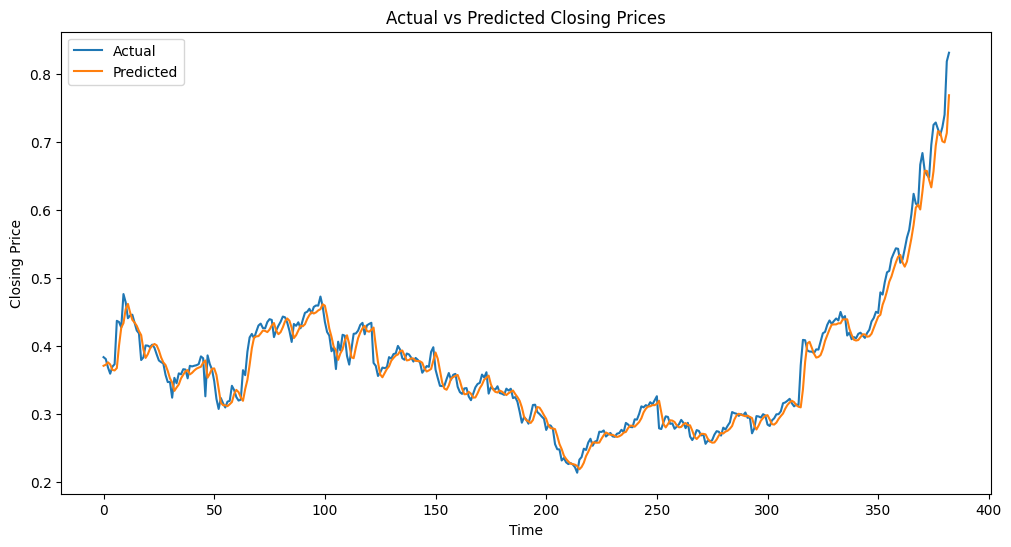

Training Time: 354.2373650074005
Prediction Time: 1.4789516925811768
Mean Absolute Error: 0.012513973283061103
Mean Squared Error: 0.00032944067501414404


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the dataset
data = pd.read_csv("TSLA.csv")

# Step 2: Extract the relevant feature
# For simplicity, let's assume we're only interested in the closing prices
close_prices = data['Close'].values.reshape(-1, 1)

# Step 3: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Step 4: Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Step 5: Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 100
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 6: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model and record the training time
start_time = time.time()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
training_time = time.time() - start_time

# Step 8: Make predictions and record prediction time
start_time = time.time()
predicted_values = model.predict(X_test)
prediction_time = time.time() - start_time

# Step 9: Calculate MAE and MSE
mae = mean_absolute_error(y_test, predicted_values)
mse = mean_squared_error(y_test, predicted_values)

# Plot a graph for predicted values against actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print("Training Time:", training_time)
print("Prediction Time:", prediction_time)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Epoch 1/50


c:\Users\amanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0620 - val_loss: 0.0176
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - val_loss: 0.0129
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - val_loss: 0.0074
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0054

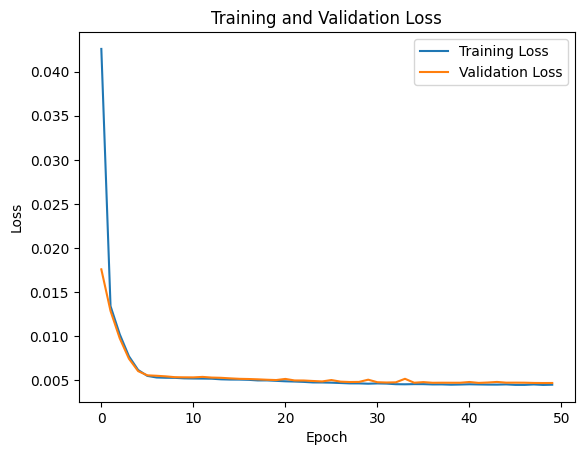

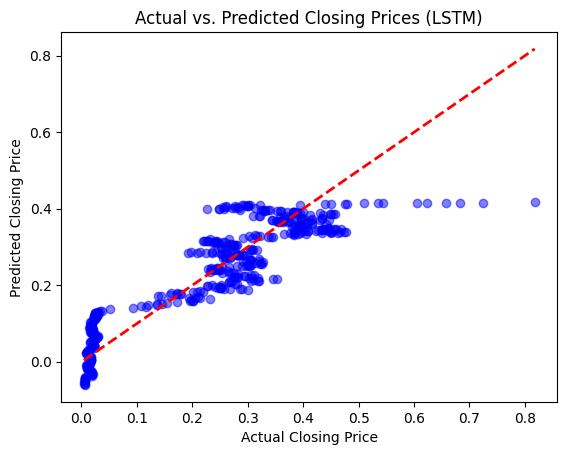

R-squared (Accuracy) on training data: 1.00


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())
# Define features (date) and target (closing price)
X = data[['Date']].values
y = data['Close'].values

# Normalize the data
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model and measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted closing prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs. Predicted Closing Prices (LSTM)')
plt.show()

# Calculate R-squared (Accuracy) on training data
y_true = close_prices[sequence_length:]
r2_train = r2_score(y_true, train_predictions)
print(f"R-squared (Accuracy) on training data: {r2_train:.2f}")